In [1]:
from google.colab import files
uploaded = files.upload()


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("StudentPerformanceFactors.csv")  # Change name if different
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

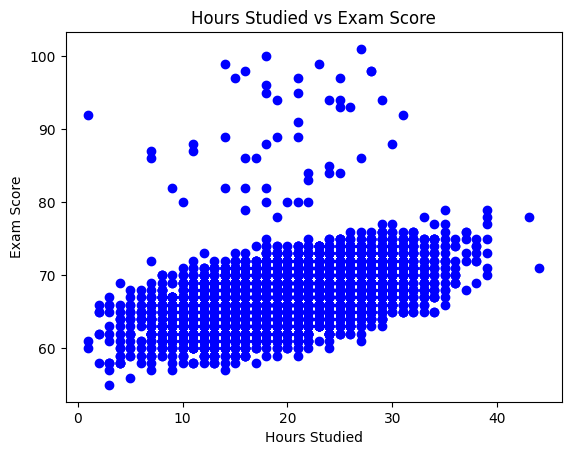

In [8]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


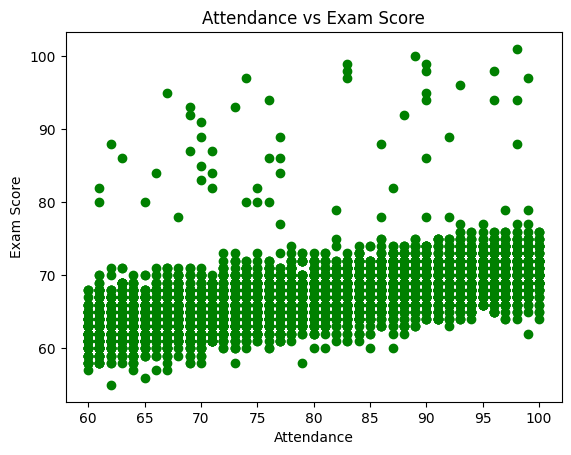

In [9]:
plt.scatter(df['Attendance'], df['Exam_Score'], color='green')
plt.title("Attendance vs Exam Score")
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.show()


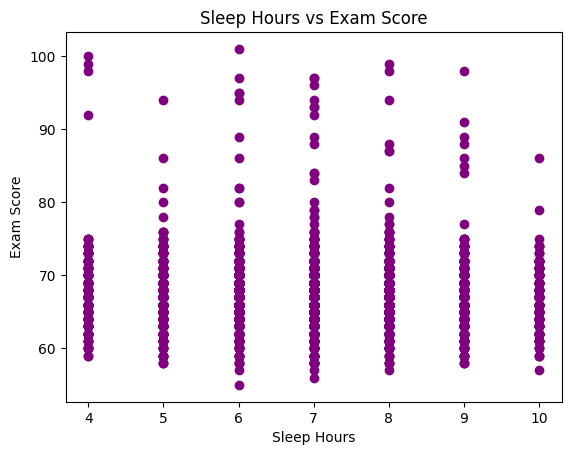

In [10]:
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], color='purple')
plt.title("Sleep Hours vs Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Motivation_Level']]
y = df['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
df.dtypes


,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [14]:
# Step 1: Convert all categorical columns to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df)

# Step 2: Define X and y
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Step 3: Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict & evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 3.252081227589894
R2 Score: 0.7699282240123635


In [15]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


      Actual  Predicted
743       65  64.530589
5551      65  65.261374
3442      71  71.536378
6571      64  64.268992
4204      66  66.524996


In [16]:
import joblib
joblib.dump(model, 'student_score_model.pkl')
# modle save kia is name sa

['student_score_model.pkl']

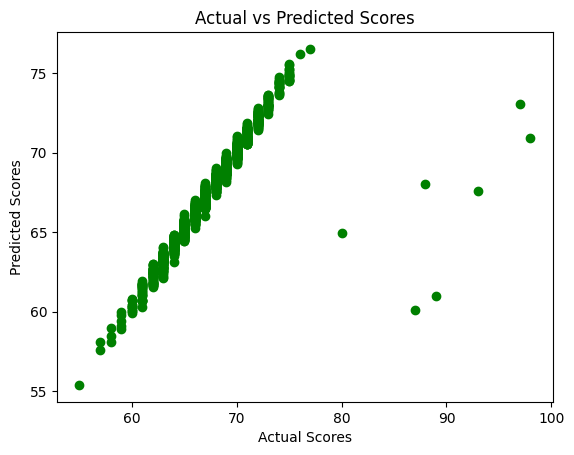

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 2: Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 3: Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Step 4: Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Step 5: Evaluate
print("▶ Polynomial Regression")
print("R2 Score:", r2_score(y_test_poly, y_pred_poly))
print("Mean Squared Error:", mean_squared_error(y_test_poly, y_pred_poly))

# Step 6: Save model
import joblib
joblib.dump(poly_model, 'polynomial_model.pkl')


▶ Polynomial Regression
R2 Score: 0.7445417379779665
Mean Squared Error: 3.610921047522314


['polynomial_model.pkl']

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Split original data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Step 3: Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Step 4: Evaluate
print("\n▶ Random Forest Regressor")
print("R2 Score:", r2_score(y_test_rf, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test_rf, y_pred_rf))

# Step 5: Save model
joblib.dump(rf_model, 'random_forest_model.pkl')



▶ Random Forest Regressor
R2 Score: 0.6695982684576038
Mean Squared Error: 4.670252420574887


['random_forest_model.pkl']

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

# Step 1: Select Top 10 Features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# (Optional) print selected column names
selected_columns = X.columns[selector.get_support()]
print("\n▶ Selected Top 10 Features:", list(selected_columns))

# Step 2: Train/Test Split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 3: Train model
fs_model = LinearRegression()
fs_model.fit(X_train_fs, y_train_fs)

# Step 4: Predict
y_pred_fs = fs_model.predict(X_test_fs)

# Step 5: Evaluate
print("\n▶ Feature Selection + Linear Regression")
print("R2 Score:", r2_score(y_test_fs, y_pred_fs))
print("Mean Squared Error:", mean_squared_error(y_test_fs, y_pred_fs))

# Step 6: Save model
joblib.dump(fs_model, 'feature_selected_model.pkl')



▶ Selected Top 10 Features: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Parental_Involvement_High', 'Parental_Involvement_Low', 'Access_to_Resources_High', 'Access_to_Resources_Low', 'Peer_Influence_Negative', 'Parental_Education_Level_Postgraduate']

▶ Feature Selection + Linear Regression
R2 Score: 0.7137597156428164
Mean Squared Error: 4.0460271640968815


['feature_selected_model.pkl']

In [22]:
print("\n Model Comparison Summary")
print(f"Linear Regression: Already Done")
print(f"Polynomial Regression R²: {r2_score(y_test_poly, y_pred_poly):.4f}")
print(f"Random Forest R²:        {r2_score(y_test_rf, y_pred_rf):.4f}")
print(f"Feature Selected R²:     {r2_score(y_test_fs, y_pred_fs):.4f}")



 Model Comparison Summary
Linear Regression: Already Done
Polynomial Regression R²: 0.7445
Random Forest R²:        0.6696
Feature Selected R²:     0.7138


In [23]:
# yahi model use karo for prediction
joblib.load('random_forest_model.pkl')


RandomForestRegressor(random_state=42)

In [ ]:
import joblib
import pandas as pd

model = joblib.load('random_forest_model.pkl')

# Dummy student input (replace with real values)
student_data = {
    'Hours_Studied': 5,
    'Attendance': 90,
    'Parental_Involvement': 'High',
    'Access_to_Resources': 'Good',
    'Extracurricular_Activities': 'Moderate',
    'Sleep_Hours': 7,
    'Previous_Scores': 70,
    'Motivation_Level': 'High',
    'Internet_Access': 'Yes',
    'Tutoring_Sessions': 2,
    'Family_Income': 'Middle',
    'Teacher_Quality': 'Good',
    'School_Type': 'Public',
    'Peer_Influence': 'Positive',
    'Physical_Activity': 3,
    'Learning_Disabilities': 'No',
    'Parental_Education_Level': 'Graduate',
    'Distance_from_Home': 'Near',
    'Gender': 'Male'
}


df_input = pd.DataFrame([student_data])


df_input_encoded = pd.get_dummies(df_input)


df_input_encoded = df_input_encoded.reindex(columns=X.columns, fill_value=0)


predicted_score = model.predict(df_input_encoded)
print("Predicted Exam Score:", predicted_score[0])


Predicted Exam Score: 66.06


In [ ]:
import joblib
import pandas as pd


model = joblib.load('random_forest_model.pkl')


student_data = {
    'Hours_Studied': int(input("Hours Studied: ")),
    'Attendance': int(input("Attendance (%): ")),
    'Parental_Involvement': input("Parental Involvement (High/Medium/Low): "),
    'Access_to_Resources': input("Access to Resources (Good/Moderate/Poor): "),
    'Extracurricular_Activities': input("Extracurricular Activities (High/Moderate/None): "),
    'Sleep_Hours': int(input("Sleep Hours: ")),
    'Previous_Scores': int(input("Previous Scores: ")),
    'Motivation_Level': input("Motivation Level (High/Medium/Low): "),
    'Internet_Access': input("Internet Access (Yes/No): "),
    'Tutoring_Sessions': int(input("Tutoring Sessions: ")),
    'Family_Income': input("Family Income (High/Middle/Low): "),
    'Teacher_Quality': input("Teacher Quality (Good/Average/Poor): "),
    'School_Type': input("School Type (Public/Private): "),
    'Peer_Influence': input("Peer Influence (Positive/Negative/Neutral): "),
    'Physical_Activity': int(input("Physical Activity (hours/week): ")),
    'Learning_Disabilities': input("Learning Disabilities (Yes/No): "),
    'Parental_Education_Level': input("Parental Education (Graduate/Undergraduate/None): "),
    'Distance_from_Home': input("Distance from Home (Near/Far): "),
    'Gender': input("Gender (Male/Female): ")
}


df_input = pd.DataFrame([student_data])


df_input_encoded = pd.get_dummies(df_input)


df_input_encoded = df_input_encoded.reindex(columns=X.columns, fill_value=0)


predicted_score = model.predict(df_input_encoded)
print("\n🎯 Predicted Exam Score:", round(predicted_score[0], 2))


Hours Studied: 7
Attendance (%): 78
Parental Involvement (High/Medium/Low): low
Access to Resources (Good/Moderate/Poor): good
Extracurricular Activities (High/Moderate/None): none
Sleep Hours: 6
Previous Scores: 78
Motivation Level (High/Medium/Low): low
Internet Access (Yes/No): no
Tutoring Sessions: 6
Family Income (High/Middle/Low): low
Teacher Quality (Good/Average/Poor): poor
School Type (Public/Private): private
Peer Influence (Positive/Negative/Neutral): positive
Physical Activity (hours/week): 5
Learning Disabilities (Yes/No): yes
Parental Education (Graduate/Undergraduate/None): graduate
Distance from Home (Near/Far): near
Gender (Male/Female): male

🎯 Predicted Exam Score: 63.77
